#### Регрессионная модель с байесовской точки зрения

При вероятностном подходе модель линейной регрессии можно выразить
следующей формулой:

$$y \sim N(\mu=\alpha+x\beta, \epsilon)$$

Поскольку значения $\alpha, \beta, \epsilon$ неизвестны, формируем для них априорные распределения, самый классический и разумный вариант:

$$\alpha \sim N(\mu_\alpha, \sigma_\alpha)$$
$$\beta \sim N(\mu_\beta, \sigma_\beta)$$
$$\epsilon \sim |N(0, \sigma_\epsilon)|$$

Точечная оценка, получаемая с использованием метода наименьших квадратов (OLS), согласовывается с оценкой апостериорного максимума (maximum a posteriori – MAP) (модой апостериорного распределения), полученной из байесовской простой линейной регрессии с плоскими априорными распределениями.

Альтернативами HalfNormal-распределению для $\epsilon$ является равномерное распределение $Uniform(a, b)$ и полураспределение Коши $HalfCauchy(x_0, \gamma)$. В общем случае полураспределение Коши успешно работает как эффективное априорное распределение регуляризации. 

Однако равномерные распределения не всегда являются удачным выбором, за исключением тех случаев, когда известно, что параметр действительно строго ограничен.

Воспользуемся сгенерированным набором данных для примера:

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%load_ext watermark
%watermark --iversions

arviz     : 0.11.1
pymc3     : 3.10.0
numpy     : 1.19.2
seaborn   : 0.10.0
scipy     : 1.5.2
pandas    : 1.1.4
matplotlib: 3.3.3



In [3]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real*x
y = y_real + eps_real

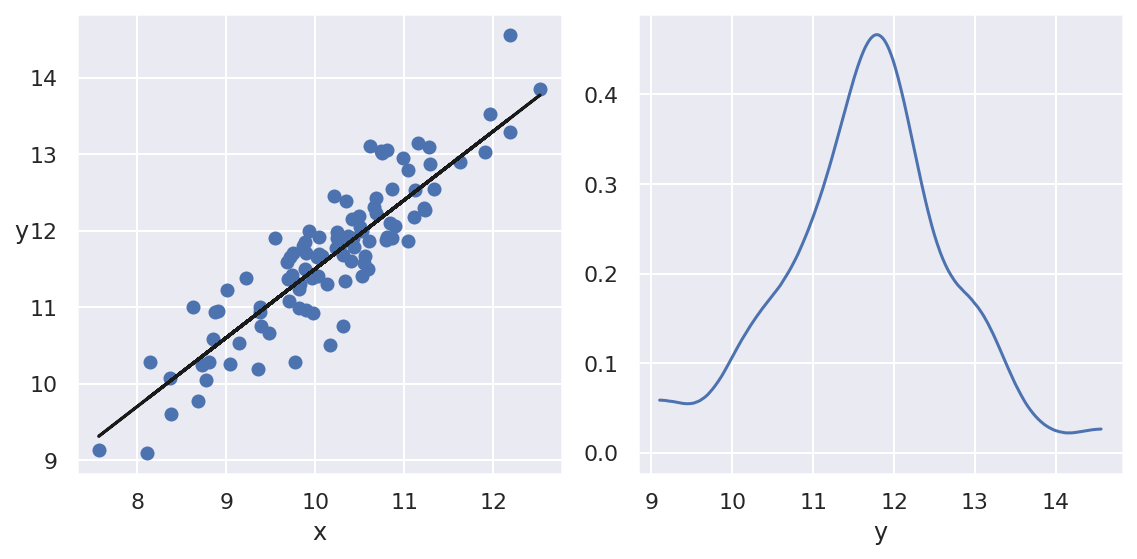

In [4]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(x, y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

In [5]:
with pm.Model() as model_g:
    
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    eps = pm.HalfCauchy('eps', 5)
    
    # Likelihood
    mu = pm.Deterministic('mu', alpha + beta*x)
    y_var = pm.Normal('y', mu=mu, sd=eps, observed=y)
    # Аналог без pm.Deterministic: 
    # y = pm.Normal('y', mu=alpha + beta*x, sd=eps, observed=y)
    
    trace_g = pm.sample(2000, tune=1000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9 seconds.


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'eps'}>,
        <AxesSubplot:title={'center':'eps'}>]], dtype=object)

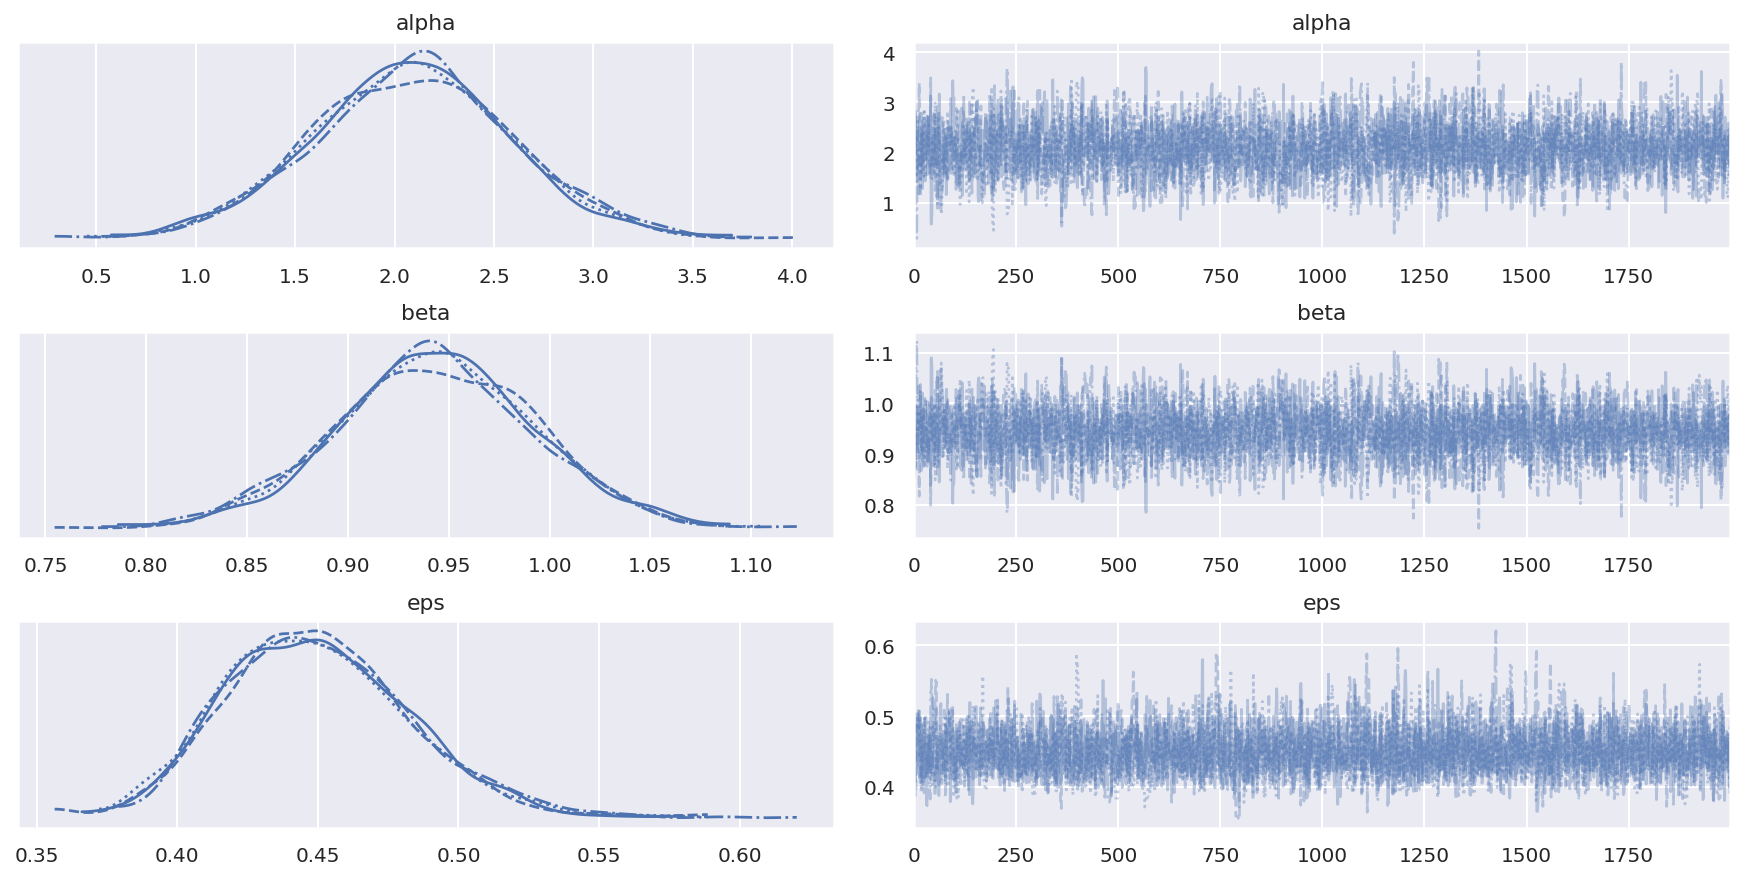

In [6]:
az.plot_trace(trace_g, var_names=['alpha', 'beta', 'eps'])

In [7]:
az.summary(trace_g, var_names=['alpha', 'beta', 'eps'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,2.088,0.498,1.145,3.042,0.010,0.007,2447.0,2445.0,2450.0,2626.0,1.0
beta,0.944,0.049,0.848,1.034,0.001,0.001,2452.0,2448.0,2453.0,2735.0,1.0
eps,0.450,0.033,0.390,0.511,0.001,0.000,3069.0,3041.0,3059.0,2410.0,1.0


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

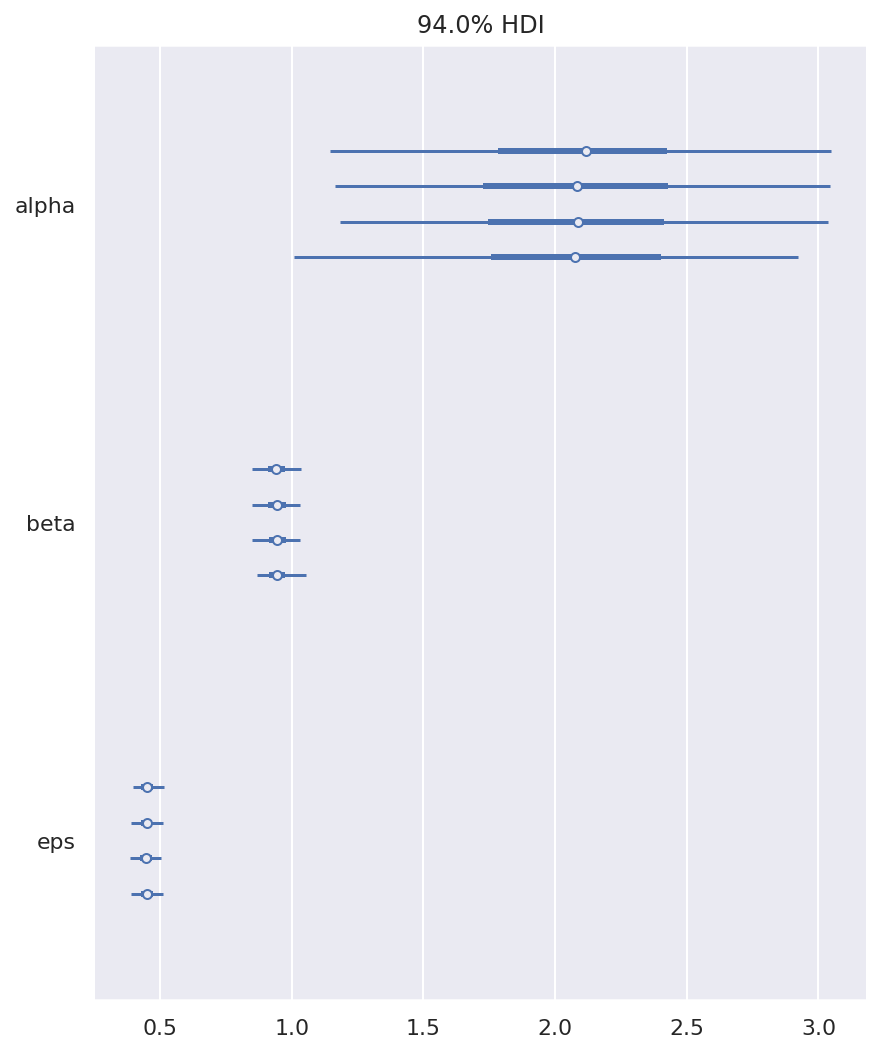

In [8]:
az.plot_forest(trace_g, var_names=['alpha', 'beta', 'eps'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta'}>,
       <AxesSubplot:title={'center':'eps'}>], dtype=object)

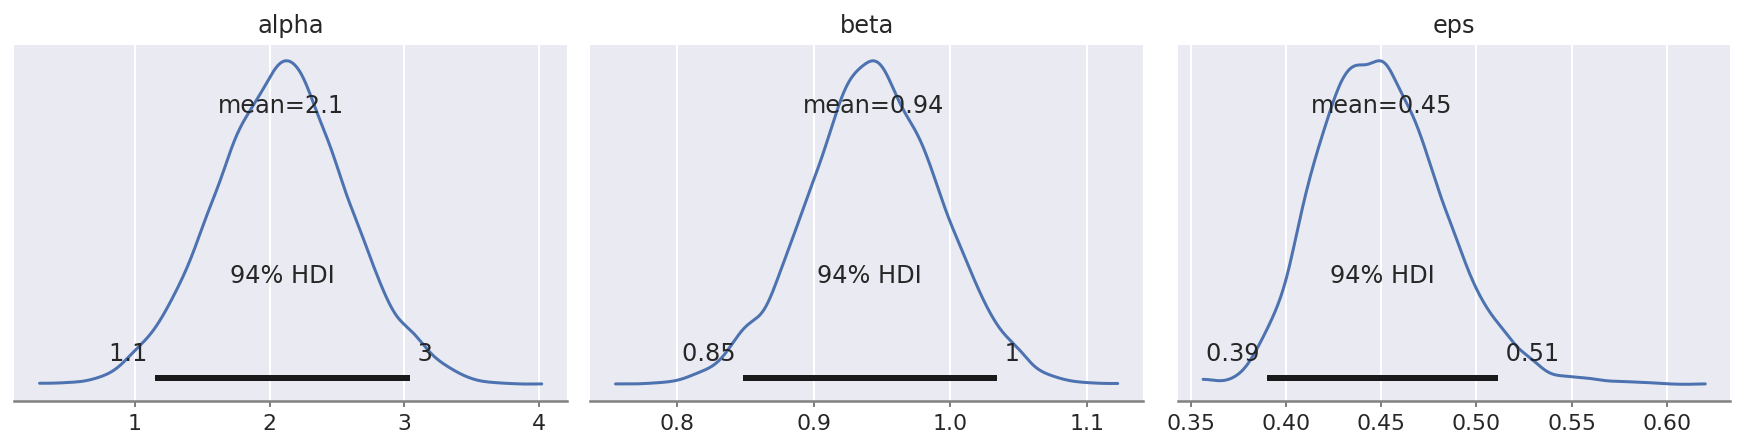

In [9]:
az.plot_posterior(trace_g, 
                  var_names=['alpha', 'beta', 'eps'],
                  figsize=(12,3))

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta'}>,
       <AxesSubplot:title={'center':'eps'}>], dtype=object)

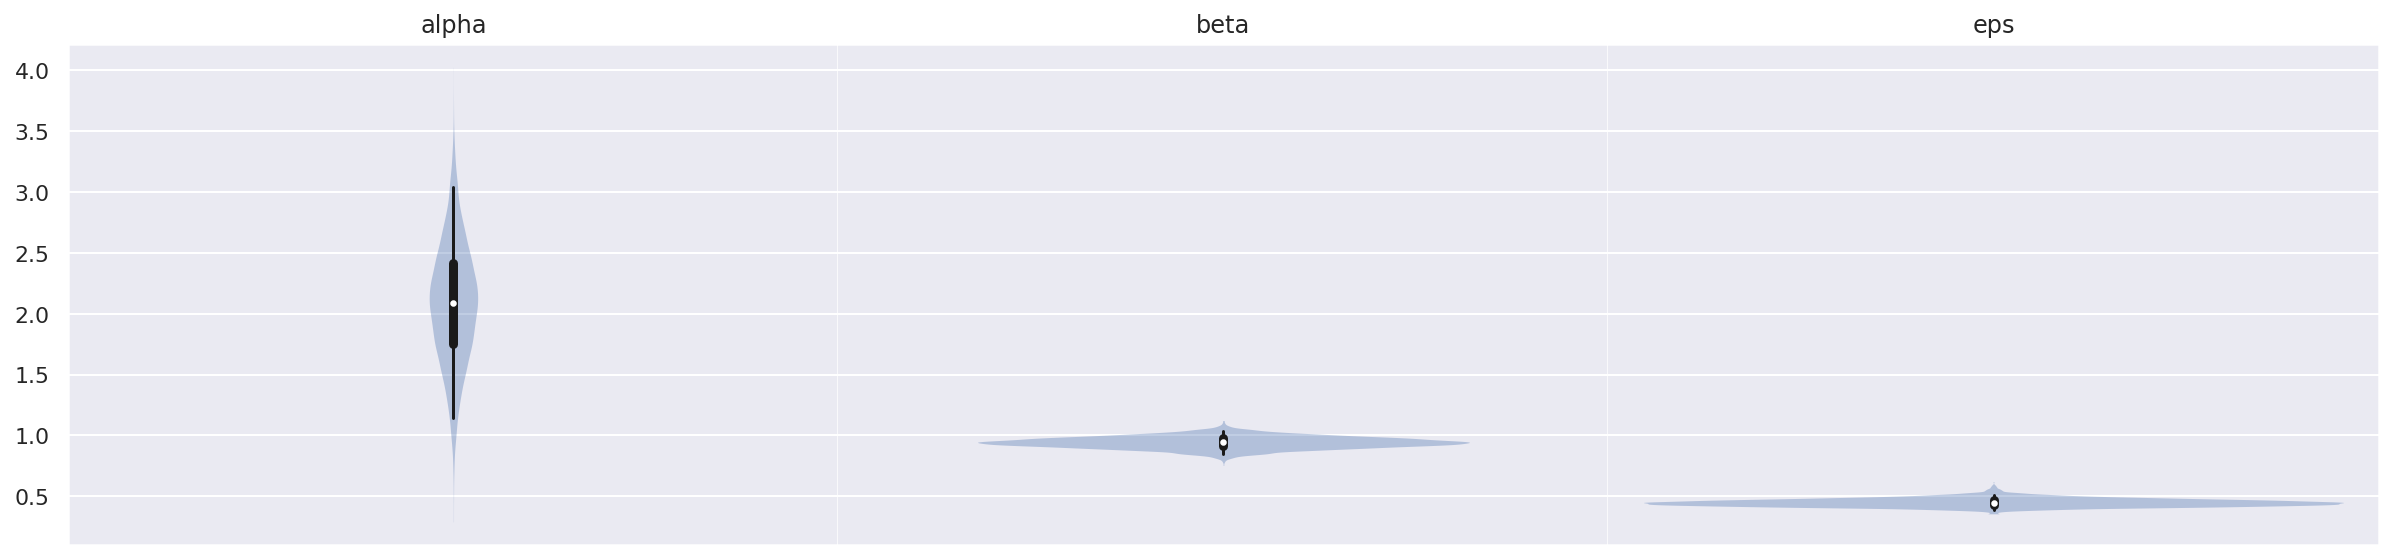

In [10]:
az.plot_violin(trace_g, var_names=['alpha', 'beta', 'eps'],)

Использование линейных моделей приводит к апостериорному распределению, где $\alpha$ и $\beta$ тесно взаимосвязаны, то есть между ними существует сильная корреляция.

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/plots/pairplot.py:188: UserWarning: plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs
  UserWarning,
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<AxesSubplot:xlabel='alpha', ylabel='beta'>

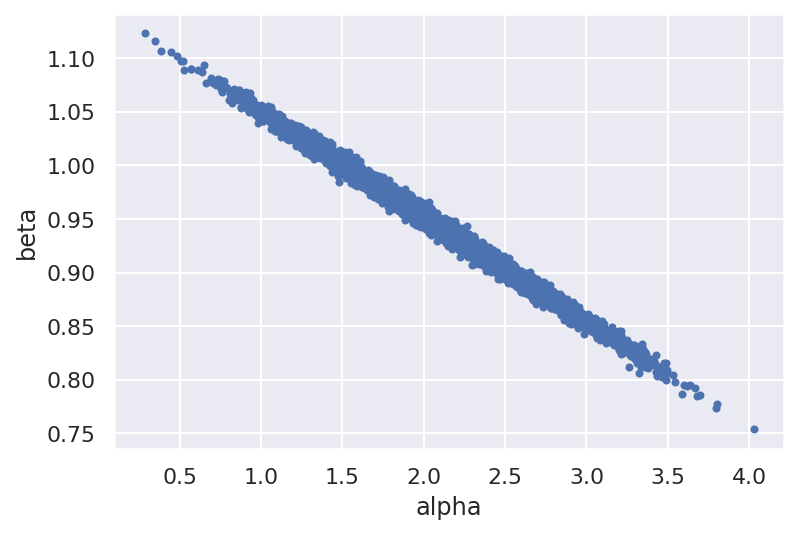

In [11]:
az.plot_pair(trace_g, var_names=['alpha', 'beta'], 
             plot_kwargs={'alpha': 0.01})

Корреляция, наблюдаемая на графике, является прямым следствием наших
предположений. Не имеет значения, какая из линий полностью соответствует исследуемым данным, все они должны проходить через одну точку, то есть через среднее значение переменной x и среднее значение переменной y. Следовательно, процесс подгонки линии в некоторой степени равнозначен вращению прямой линии, закрепленной в центре данных.

При этом  тот факт, что для линии установлено ограничивающее условие прохождения через точку, соответствующую среднему значению данных, является истинным только для метода наименьших квадратов (и соответствующих предварительных предположений). При использовании байесовских методов это ограничение ослабляется.

Форма апостериорного распределения (исключая $\epsilon$) представляет собой весьма диагональное пространство (very diagonal space). Это может стать проблемой для сэмплеров, таких как алгоритм Метрополиса–Гастингса, или в меньшей степени для NUTS.




#### Изменение данных перед обработкой

Одним из простых способов устранения корреляции между $\alpha$ и $\beta$ является центрирование переменной x.

В результате x' центрируется относительно 0, таким образом центр вра-
щения (осевая точка) при изменении угла наклона неизменно является точкой пересечения, следовательно, вероятное пространство параметров теперь в большей степени приобретает форму круга и становится менее коррелированным.

Возврат к исходному масштабу:
$$y = \alpha' + \beta(x - \hat x ) + \epsilon$$
$$y=\alpha' - \beta' \hat x + \beta'x + \epsilon$$

=>$$\alpha = \alpha' - \beta' \hat x$$
$$\beta = \beta'$$

Помимо центрирования данные можно нормализовать, что чатсо используется на практике в статистике и машинном обучении.
В целом нормализация данных помогает мыслить в терминах стандартизированных оценок (z-оценок).

#### Интерпретация и визуальное представление апостериорного распределения

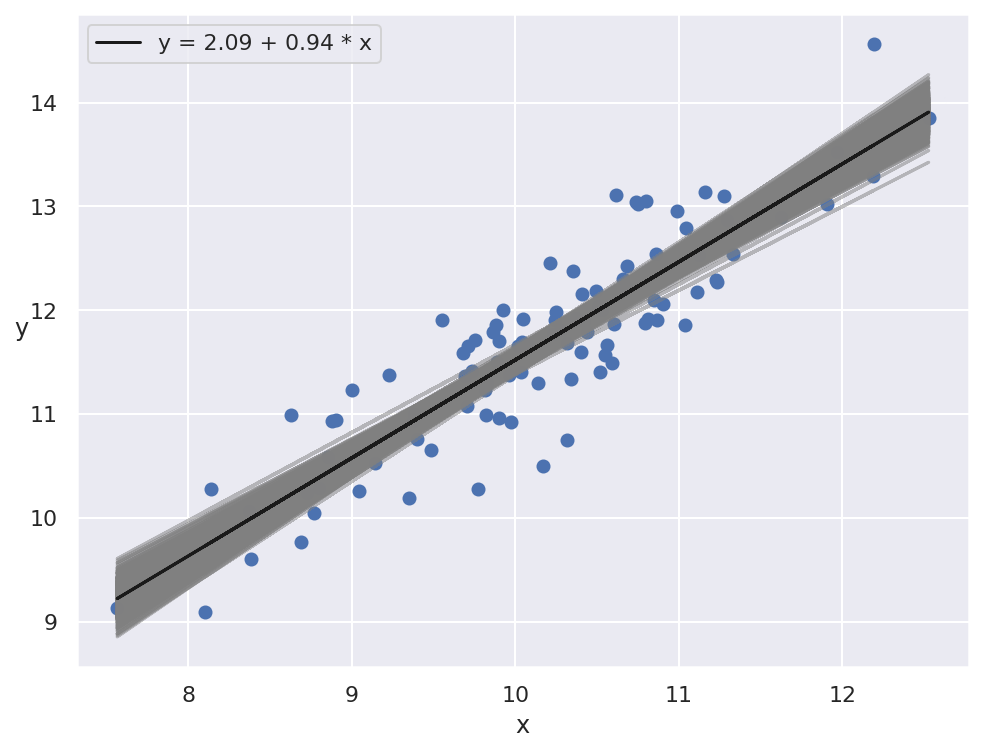

In [12]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(x, y)

alpha_m = trace_g['alpha'].mean()
beta_m = trace_g['beta'].mean()

draws = range(0, len(trace_g['alpha']), 10)
plt.plot(x, trace_g['alpha'][draws] + trace_g['beta'][draws] *
        x[:, np.newaxis], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

Возможно добавление интервала плотности апостериорного распределения для $\mu$ прямо на график. Благодаря сохранению значений $\mu$ в памяти с помощью pm.Deterministic.

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


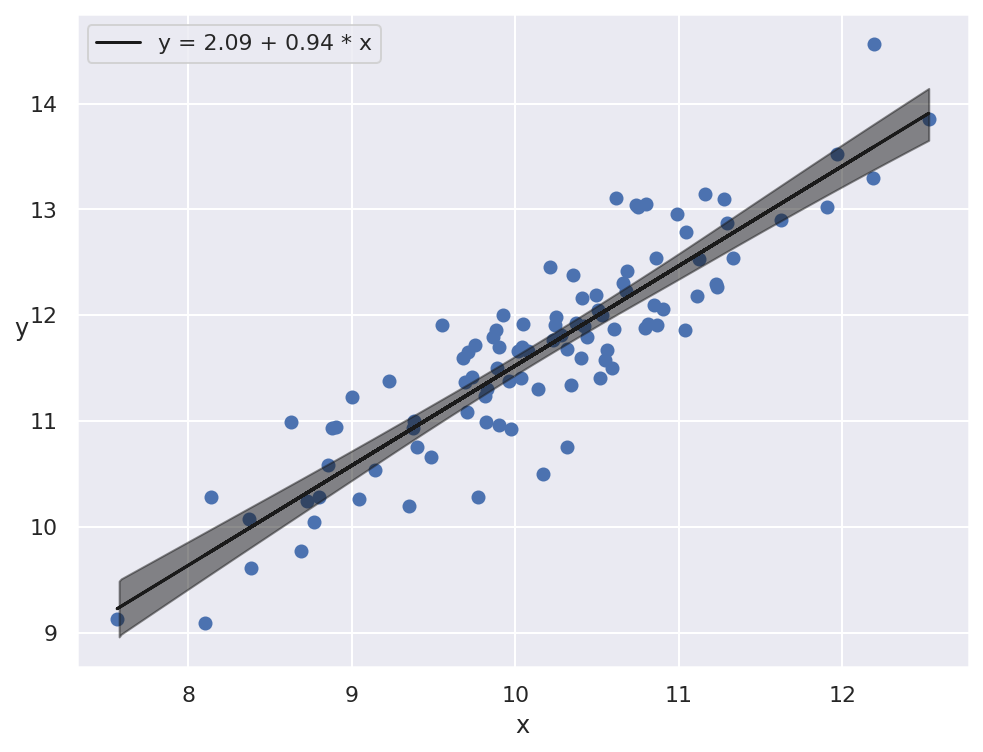

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
sig = az.plot_hpd(x, trace_g['mu'], credible_interval=0.95, color='k')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

Также дополнительным графиком для визуального анализа может служить плотность апостериорного распределения прогнозируемой целевой переменной $\hat{y}$, т.е. интервала, где ожидается наблюдение x% будущих данных с учетом выбранной модели.

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will chan

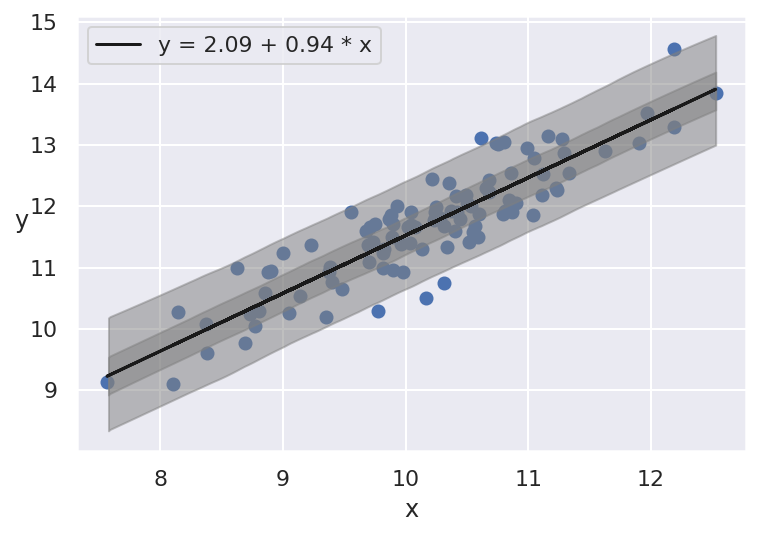

In [14]:
ppc = pm.sample_posterior_predictive(trace_g, samples=2000, model=model_g)

plt.scatter(x, y)
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x'
        )
az.plot_hpd(x, ppc['y'], credible_interval=0.5, color='gray')
az.plot_hpd(x, ppc['y'], credible_interval=0.95, color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

In [15]:
# Значение R^2 относительно апостериорного распределения прогнозируемой целевой переменной
az.r2_score(y, ppc['y'])

r2        0.789086
r2_std    0.005960
dtype: float64

#### Коэффициент корреляции Пирсона, вычисляемый по многомерному гауссову распределению:

Один из возможных способов вычисления коэффициента корреляции Пирсона – оценка ковариационной матрицы многомерного гауссова распределения. 

Рассмотрим вариант с размерностью d=2.

Для полного описания данного гауссова распределения, необходим вектор средних $\overline{\mu}$ и ковариационная матрица  $\Sigma=\begin{bmatrix}
\sigma^2_{x_1} & \rho \sigma_{x_1}\sigma_{x_2} \\
\rho\sigma_{x_1}\sigma_{x_2} & \sigma^2_{x_2} 
\end{bmatrix}$, где $\rho$-коэффициент корреляции Пирсона между регрессорами (поскольку переменных всего две, необходим всего один коэффициент)

Для примера рассмотрим конутрные графики - графики линий уровня:

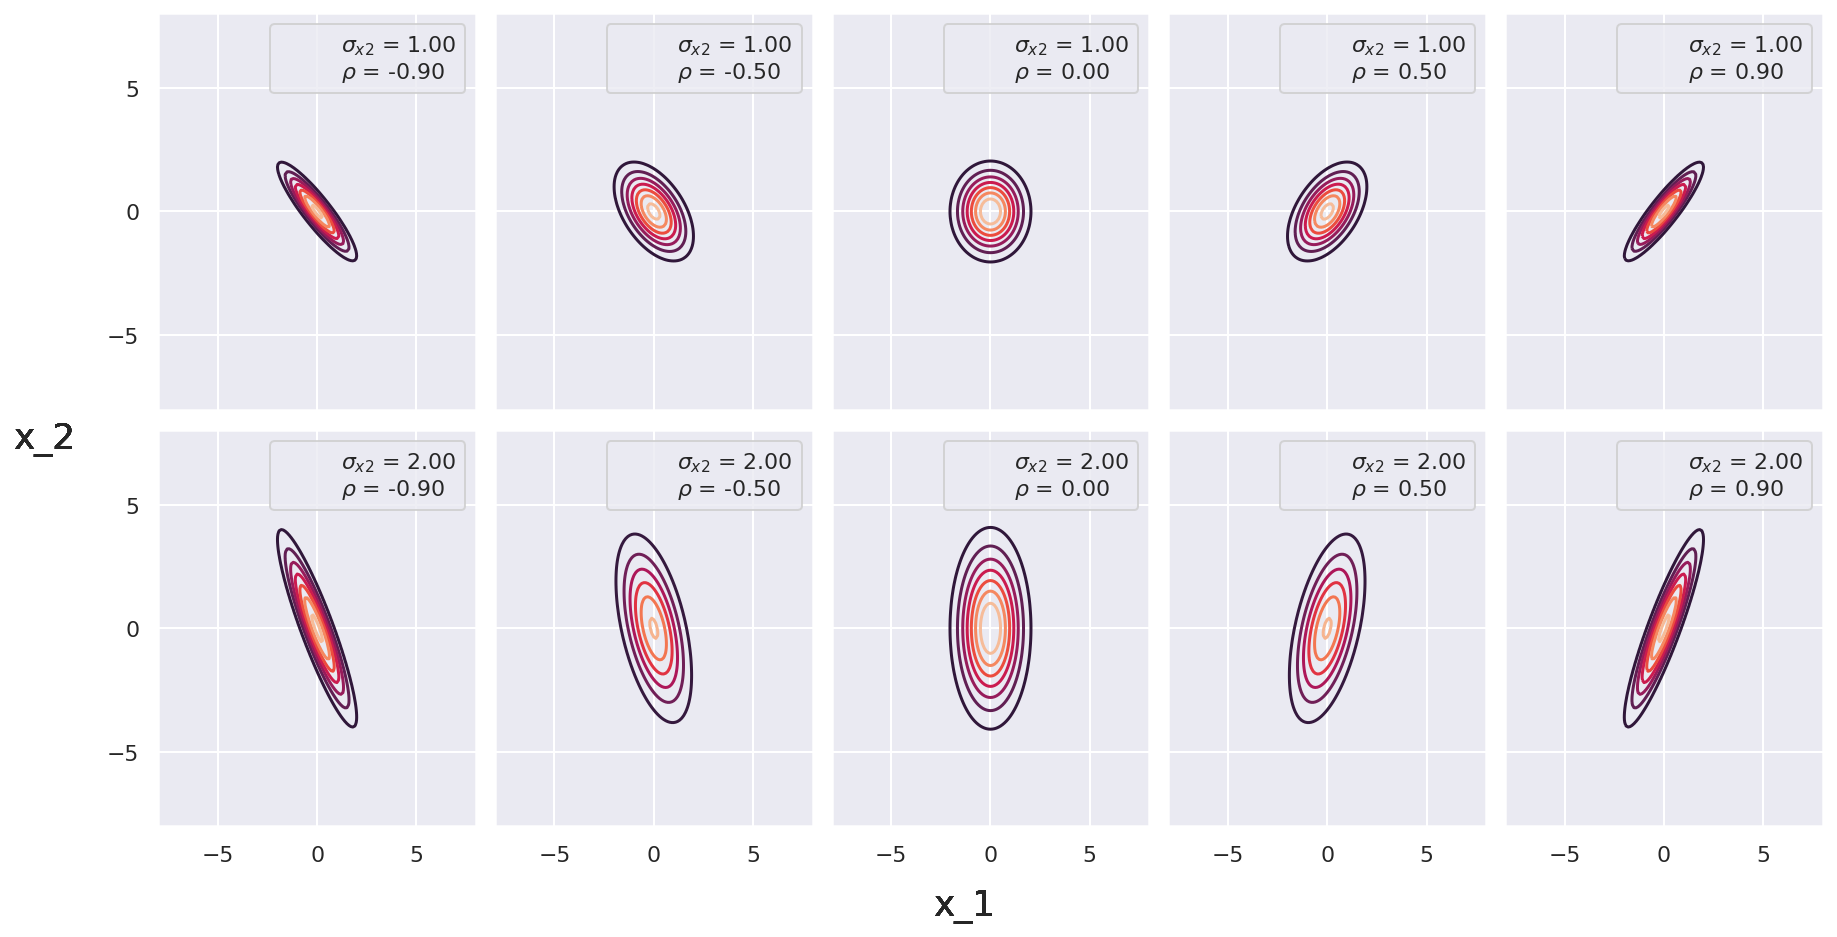

In [30]:
sigma_x1 = 1
sigmas_x2 = [1,2]
rhos = [-0.9, -0.5, 0, 0.5, 0.9]

k, l = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(k.shape + (2,))
pos[:, :, 0] = k
pos[:, :, 1] = l

f, ax = plt.subplots(len(sigmas_x2), len(rhos),
                     sharex=True, sharey=True, 
                     figsize=(12, 6),
                     constrained_layout=True)

for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        cov = [[sigma_x1**2, sigma_x1*sigma_x2*rho],
               [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        
        ax[i, j].contour(k, l, rv.pdf(pos))
        ax[i, j].set_xlim(-8, 8)
        ax[i, j].set_ylim(-8, 8)
        ax[i, j].set_yticks([-5, 0, 5])
        ax[i, j].plot(0, 0, 
        label=f'$\\sigma_{{x2}}$ = {sigma_x2:3.2f}\n$\\rho$ = {rho:3.2f}', alpha=0)
        ax[i, j].legend()
        f.text(0.5, -0.05, 'x_1', ha='center', fontsize=18)
        f.text(-0.05, 0.5, 'x_2', va='center', fontsize=18, rotation=0)

Поскольку значения элементов ковариационной матрицы неизвестны, мы не устанавливаем для них априорные распределения.
Есть несколько вариантов решения:

1. Использование распределения Уишарта(Wishart distribution). Оно является сопряженным априорным распределением обращенной ковариационной матрицы по многомерной нормали.

2. Априорное распределение LKJ Cholesky: https://docs.pymc.io/notebooks/LKJ.html

3. Задание априорных распределений для элементов ковариационной матрицы. Рассмотрим этот вариант для простейшего случая многомерного гауссова распределения.

In [32]:
data = np.stack((x, y)).T
with pm.Model() as pearson_model:
    # Вектор средний значений
    mu = pm.Normal('mu', mu=data.mean(0), sd=10, shape=2)
    # Априорные распределения для ковариационной матрицы
    sigma1 = pm.HalfNormal('sigma1', 10)
    sigma2 = pm.HalfNormal('sigma2', 10)
    rho = pm.Uniform('rho', -1, 1)
    # Определяем R^2 как детерминированную переменную для расчета
    r2 = pm.Deterministic('r2', rho**2)
    # Формирование ковариационной матрицы
    cov = pm.math.stack(([sigma1**2, rho*sigma1*sigma2],
                         [rho*sigma1*sigma2, sigma2**2])
                       )
    # Правдоподобие
    y_pred = pm.MvNormal('y_pred', mu=mu, cov=cov, observed=data)
    
    trace_p = pm.sample(1000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rho, sigma2, sigma1, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'r2'}>,
        <AxesSubplot:title={'center':'r2'}>]], dtype=object)

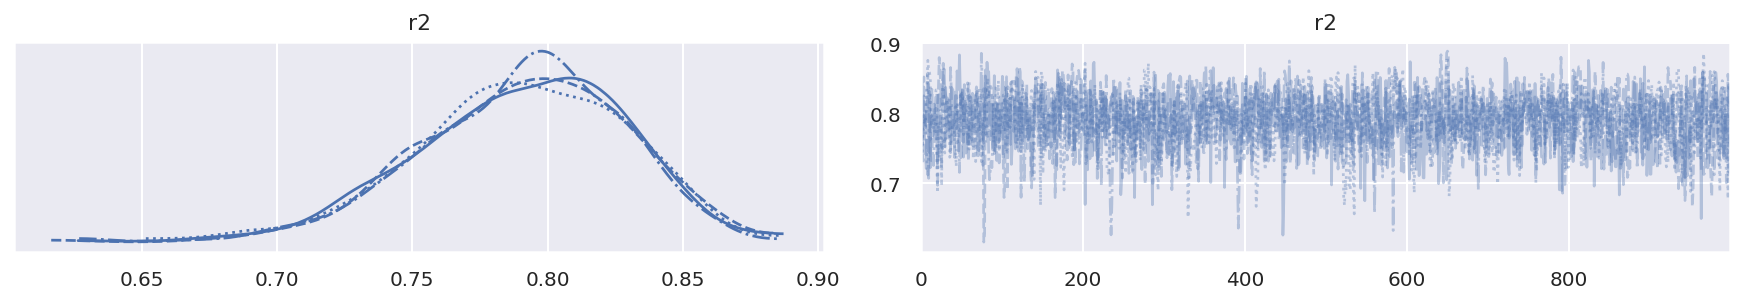

In [33]:
az.plot_trace(trace_p, var_names=['r2'])

In [34]:
az.summary(trace_p, var_names=['r2'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
r2,0.79,0.038,0.716,0.855,0.001,0.001,1844.0,1844.0,1837.0,2037.0,1.0


Полученное значение корреляции довольно близко к рассчитанному значению в предыдущем примере.

#### Робастная линейная регрессия